In [1]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr


def custom_sum(delta_materials_row):
    total = 0
    for val in delta_materials_row:
        if val == 4:
            total += 3
        else:
            total += val
    return total

def custom_max(delta_materials_row):
    max_val = max(delta_materials_row)
    return 3 if max_val == 4 else max_val

def custom_immediate_val_1(delta_materials_row):
    return 3 if delta_materials_row[0] == 4 else delta_materials_row[0]

def custom_immediate_val_2(delta_materials_row):
    return 3 if delta_materials_row[1] == 4 else delta_materials_row[1]

def custom_immediate_val_3(delta_materials_row):
    return 3 if delta_materials_row[2] == 4 else delta_materials_row[2]

def active_material_sum(delta_materials, move_match):
    active_material_sum_hm = defaultdict(list)    # {sum : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_sum = custom_sum(active_player_delta)
        if active_material_sum not in active_material_sum_hm:
            active_material_sum_hm[active_material_sum] = [0, 0]
        
        if move_match[i] == 1:
            active_material_sum_hm[active_material_sum][0] += 1
            active_material_sum_hm[active_material_sum][1] += 1
        else:
            active_material_sum_hm[active_material_sum][1] += 1
    
    active_material_sums, accuracies = [], []
    for active_material_sum, [total_correct, total] in active_material_sum_hm.items():
        active_material_sums.append(active_material_sum)
        accuracies.append(total_correct / total)
        
    correlation_coefficient, p_val = pearsonr(active_material_sums, accuracies)
    return [np.array(active_material_sums), np.array(accuracies), correlation_coefficient, p_val]


def active_material_max(delta_materials, move_match):
    active_material_max_hm = defaultdict(list)    # {max : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_max = custom_max(active_player_delta)
        if active_material_max not in active_material_max_hm:
            active_material_max_hm[active_material_max] = [0, 0]
        
        if move_match[i] == 1:
            active_material_max_hm[active_material_max][0] += 1
            active_material_max_hm[active_material_max][1] += 1
        else:
            active_material_max_hm[active_material_max][1] += 1
    
    active_material_maxes, accuracies = [], []
    for active_material_max, [total_correct, total] in active_material_max_hm.items():
        active_material_maxes.append(active_material_max)
        accuracies.append(total_correct / total)
        
    correlation_coefficient, p_val = pearsonr(active_immediate_maxes, accuracies)
    return [np.array(active_material_maxes), np.array(accuracies), correlation_coefficient, p_val]


def active_material_loss(delta_materials, move_match):
    active_material_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_loss = custom_sum(active_player_delta) - custom_sum(opponent_delta)
        if active_material_loss not in active_material_loss_hm:
            active_material_loss_hm[active_material_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_material_loss_hm[active_material_loss][0] += 1
            active_material_loss_hm[active_material_loss][1] += 1
        else:
            active_material_loss_hm[active_material_loss][1] += 1
            
    active_material_losses, accuracies = [], []
    for active_material_loss, [total_correct, total] in active_material_loss_hm.items():
        active_material_losses.append(active_material_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_material_loss, total_correct, total, total_correct/total)
        
    correlation_coefficient, p_val = pearsonr(active_material_losses, accuracies)
    return [np.array(active_material_losses), np.array(accuracies), correlation_coefficient, p_val]

def active_immediate_loss_1(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_1(active_player_delta) - custom_immediate_val_1(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

# make this immediate loss plot for depths 3-4 (2nd move of each player) and depths 5-6 (3rd move of each player)
def active_immediate_loss_2(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_2(active_player_delta) - custom_immediate_val_2(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)    
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

def active_immediate_loss_3(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_3(active_player_delta) - custom_immediate_val_3(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

In [13]:
# Novice elo range: 0-1199
# results_folder_only_novice_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_novice_elo'
results_folder_only_novice_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_novice_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 22000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_novice = []
all_move_matches_novice = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_novice = os.path.join(results_folder_only_novice_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_novice, 'rb') as f:
        delta_materials_novice = np.load(f, allow_pickle=True)
        all_delta_materials_novice.append(delta_materials_novice)

    move_match_path_novice = os.path.join(results_folder_only_novice_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_novice, 'rb') as f:
        move_matches_novice = np.load(f, allow_pickle=True)
        all_move_matches_novice.append(move_matches_novice)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_novice = np.concatenate(all_delta_materials_novice)
print(combined_delta_materials_novice.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_novice = np.concatenate(all_move_matches_novice)
print(combined_move_matches_novice.shape)
# print(combined_move_matches)

(880781, 36)
(880781,)


In [14]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_novice = np.delete(combined_delta_materials_novice, [0,6,12,18,24,30], axis=1)

In [17]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_novice = combined_move_matches_novice.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_novice_with_const = sm.add_constant(combined_delta_materials_novice)
combined_delta_materials_novice_with_const = np.array(combined_delta_materials_novice_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_novice = sm.Logit(combined_move_matches_novice, combined_delta_materials_novice_with_const)
logit_result_novice = logit_model_novice.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_novice = logit_result_novice.params[1:]  # Exclude the intercept
intercept_novice = logit_result_novice.params[0]

# Reshape beta_weights for interpretation
beta_weights_novice = beta_weights_novice.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_novice)
print("Intercept:", intercept_novice)

Optimization terminated successfully.
         Current function value: 0.587379
         Iterations 5
Beta Weights:
[[ 1.01844717  1.5601039   1.77399152  2.04841686  2.28964726]
 [-0.22227549 -0.57407396 -0.75513548 -0.59070421 -1.29450657]
 [-0.13926815  0.05443266  0.10403872  0.21332929  0.3786658 ]
 [-0.03786782 -0.12076209 -0.21975837 -0.06569659 -0.26249954]
 [-0.10789449 -0.06545519 -0.08880421 -0.0458034  -0.03056544]
 [ 0.04874251 -0.07622503 -0.10528629  0.01862108 -0.02494503]]
Intercept: -1.0111681480930432


In [18]:
print(logit_result_novice.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               880781
Model:                          Logit   Df Residuals:                   880750
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.07427
Time:                        23:05:11   Log-Likelihood:            -5.1735e+05
converged:                       True   LL-Null:                   -5.5886e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0112      0.004   -281.249      0.000      -1.018      -1.004
x1             1.0184      0.007    142.591      0.000       1.004       1.032
x2             1.5601      0.010    151.979      0.0

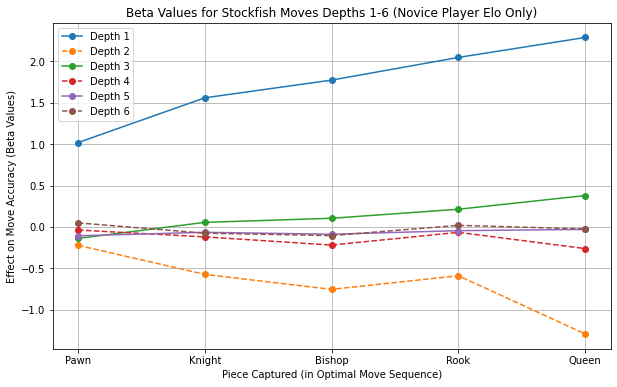

In [19]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_novice[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_novice[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Novice Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

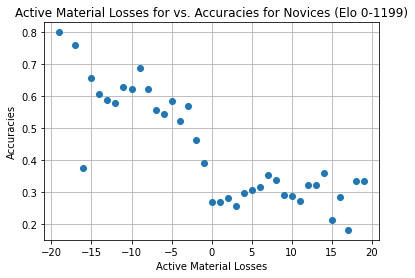

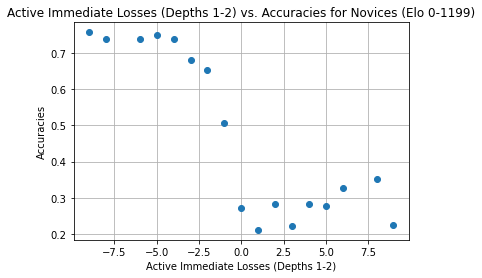

[ 0 -1  3  1 -3 -2 -5  5 -6  2  4 -8  9 -9 -4  8  6]


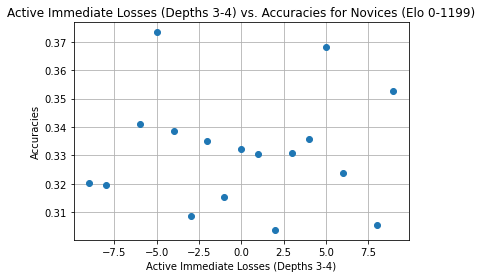

[ 0  3 -3 -1  1  5 -5  9  4 -9 -2  8  2 -4 -6  6 -8]


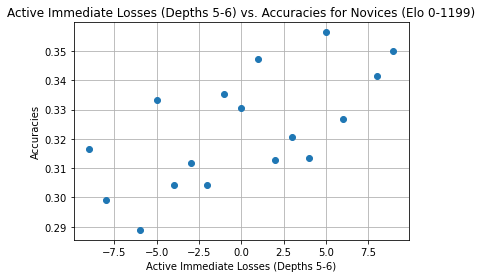

In [3]:
#------------------------plotting step---------------------------------
active_material_losses_novice, accuracies_novice, corr_co_losses_novice, p_val_losses_novice = active_material_loss(combined_delta_materials_novice, combined_move_matches_novice)

plt.plot(active_material_losses_novice, accuracies_novice, marker='o', linestyle='')
# print(active_material_losses_novice)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses for vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()


active_immediate_losses_novice, accuracies_ail_novice, corr_co_ail_novice, p_val_ail_novice = active_immediate_loss_1(combined_delta_materials_novice, combined_move_matches_novice)
# print(active_immediate_losses_novice)
plt.plot(active_immediate_losses_novice, accuracies_ail_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

active_immediate_losses_2_novice, accuracies_ail_2_novice, curr_co_ail_2_novice, p_val_ail_2_novice = active_immediate_loss_2(combined_delta_materials_novice, combined_move_matches_novice)
print(active_immediate_losses_2_novice)
plt.plot(active_immediate_losses_2_novice, accuracies_ail_2_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

active_immediate_losses_3_novice, accuracies_ail_3_novice, curr_co_ail_3_novice, p_val_ail_3_novice = active_immediate_loss_3(combined_delta_materials_novice, combined_move_matches_novice)
print(active_immediate_losses_3_novice)
plt.plot(active_immediate_losses_3_novice, accuracies_ail_3_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

In [20]:
# Amateur elo range: 1200-1599
# results_folder_only_amateur_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_amateur_elo'
results_folder_only_amateur_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_amateur_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_amateur = []
all_move_matches_amateur = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_amateur = os.path.join(results_folder_only_amateur_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_amateur, 'rb') as f:
        delta_materials_amateur = np.load(f, allow_pickle=True)
        all_delta_materials_amateur.append(delta_materials_amateur)

    move_match_path_amateur = os.path.join(results_folder_only_amateur_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_amateur, 'rb') as f:
        move_matches_amateur = np.load(f, allow_pickle=True)
        all_move_matches_amateur.append(move_matches_amateur)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_amateur = np.concatenate(all_delta_materials_amateur)
print(combined_delta_materials_amateur.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_amateur = np.concatenate(all_move_matches_amateur)
print(combined_move_matches_amateur.shape)
# print(combined_move_matches)

(3078290, 36)
(3078290,)


In [21]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_amateur = np.delete(combined_delta_materials_amateur, [0,6,12,18,24,30], axis=1)

In [23]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_amateur = combined_move_matches_amateur.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_amateur_with_const = sm.add_constant(combined_delta_materials_amateur)
combined_delta_materials_amateur_with_const = np.array(combined_delta_materials_amateur_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_amateur = sm.Logit(combined_move_matches_amateur, combined_delta_materials_amateur_with_const)
logit_result_amateur = logit_model_amateur.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_amateur = logit_result_amateur.params[1:]  # Exclude the intercept
intercept_amateur = logit_result_amateur.params[0]

# Reshape beta_weights for interpretation
beta_weights_amateur = beta_weights_amateur.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_amateur)
print("Intercept:", intercept_amateur)

Optimization terminated successfully.
         Current function value: 0.610299
         Iterations 5
Beta Weights:
[[ 1.11536715  1.68127007  1.93067269  2.1940331   2.66321827]
 [-0.24148543 -0.63788844 -0.84918448 -0.78454277 -1.47510038]
 [-0.07511892  0.1859585   0.20944378  0.37488193  0.55576712]
 [-0.057875   -0.20306751 -0.26848648 -0.17536548 -0.38688385]
 [-0.07064948  0.0012067  -0.00976758  0.05639109  0.11569168]
 [ 0.0279539  -0.11739339 -0.12081519 -0.04339154 -0.07640215]]
Intercept: -0.8065123074587865


In [27]:
print(logit_result_amateur.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              3078290
Model:                          Logit   Df Residuals:                  3078259
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.07471
Time:                        23:09:01   Log-Likelihood:            -1.8787e+06
converged:                       True   LL-Null:                   -2.0304e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8065      0.002   -442.829      0.000      -0.810      -0.803
x1             1.1154      0.004    285.042      0.000       1.108       1.123
x2             1.6813      0.006    278.442      0.0

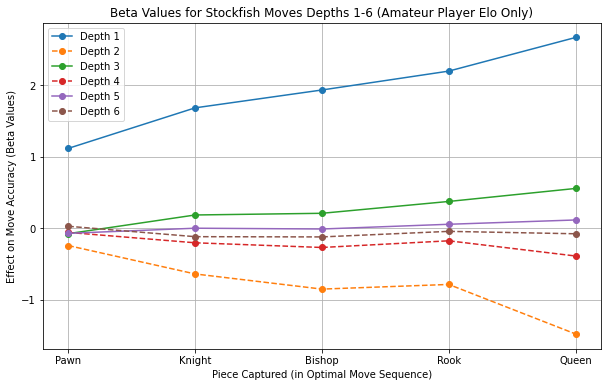

In [9]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_amateur[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_amateur[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Amateur Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

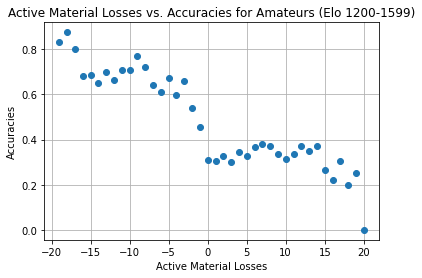

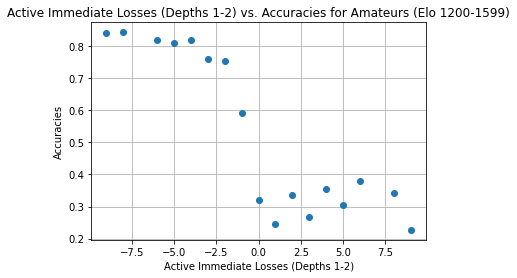

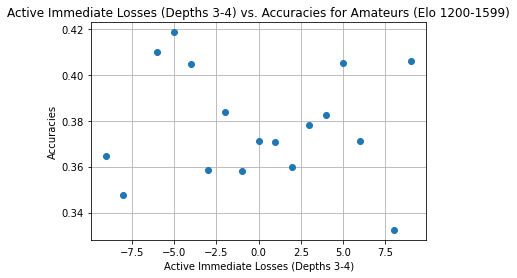

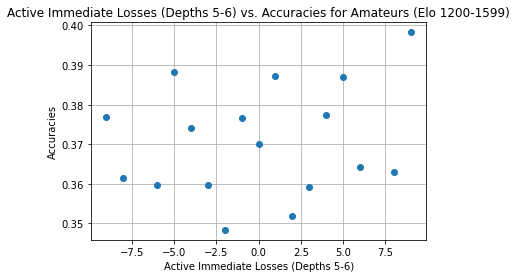

In [5]:
active_material_losses_amateur, accuracies_amateur, curr_co_losses_amateur, p_val_losses_amateur = active_material_loss(combined_delta_materials_amateur, combined_move_matches_amateur)

plt.plot(active_material_losses_amateur, accuracies_amateur, marker='o', linestyle='')
# print(active_material_losses_amateur)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()


active_immediate_losses_amateur, accuracies_ail_amateur, curr_co_ail_amateur, p_val_ail_amateur = active_immediate_loss_1(combined_delta_materials_amateur, combined_move_matches_amateur)
# print(active_immediate_losses_amateur)
plt.plot(active_immediate_losses_amateur, accuracies_ail_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

active_immediate_losses_2_amateur, accuracies_ail_2_amateur, curr_co_ail_2_amateur, p_val_ail_2_amateur = active_immediate_loss_2(combined_delta_materials_amateur, combined_move_matches_amateur)
# print(active_immediate_losses_2_amateur)
plt.plot(active_immediate_losses_2_amateur, accuracies_ail_2_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

active_immediate_losses_3_amateur, accuracies_ail_3_amateur, curr_co_ail_3_amateur, p_val_ail_3_amateur = active_immediate_loss_3(combined_delta_materials_amateur, combined_move_matches_amateur)
# print(active_immediate_losses_3_amateur)
plt.plot(active_immediate_losses_3_amateur, accuracies_ail_3_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

In [25]:
# Advanced elo range 1600-1999
# results_folder_only_advanced_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_advanced_elo'
results_folder_only_advanced_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_advanced_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_advanced = []
all_move_matches_advanced = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_advanced = os.path.join(results_folder_only_advanced_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_advanced, 'rb') as f:
        delta_materials_advanced = np.load(f, allow_pickle=True)
        all_delta_materials_advanced.append(delta_materials_advanced)

    move_match_path_advanced = os.path.join(results_folder_only_advanced_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_advanced, 'rb') as f:
        move_matches_advanced = np.load(f, allow_pickle=True)
        all_move_matches_advanced.append(move_matches_advanced)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_advanced = np.concatenate(all_delta_materials_advanced)
print(combined_delta_materials_advanced.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_advanced = np.concatenate(all_move_matches_advanced)
print(combined_move_matches_advanced.shape)
# print(combined_move_matches)

(2341944, 36)
(2341944,)


In [26]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_advanced = np.delete(combined_delta_materials_advanced, [0,6,12,18,24,30], axis=1)

In [29]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_advanced = combined_move_matches_advanced.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_advanced_with_const = sm.add_constant(combined_delta_materials_advanced)
combined_delta_materials_advanced_with_const = np.array(combined_delta_materials_advanced_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_advanced = sm.Logit(combined_move_matches_advanced, combined_delta_materials_advanced_with_const)
logit_result_advanced = logit_model_advanced.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_advanced = logit_result_advanced.params[1:]  # Exclude the intercept
intercept_advanced = logit_result_advanced.params[0]

# Reshape beta_weights for interpretation
beta_weights_advanced = beta_weights_advanced.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_advanced)
print("Intercept:", intercept_advanced)

Optimization terminated successfully.
         Current function value: 0.631520
         Iterations 6
Beta Weights:
[[ 1.15094516  1.64901575  1.94966888  2.20261339  2.77904523]
 [-0.3080486  -0.73103399 -0.9463351  -0.99287899 -1.64257228]
 [ 0.02135054  0.32396964  0.35080935  0.57316528  0.84593117]
 [-0.06916541 -0.30254185 -0.35409849 -0.31453908 -0.5800047 ]
 [-0.00966751  0.11574307  0.09561198  0.13835863  0.26823892]
 [-0.00265415 -0.15367712 -0.16282932 -0.07781641 -0.12247064]]
Intercept: -0.6156460800845285


In [30]:
print(logit_result_advanced.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              2341944
Model:                          Logit   Df Residuals:                  2341913
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.06633
Time:                        23:10:59   Log-Likelihood:            -1.4790e+06
converged:                       True   LL-Null:                   -1.5841e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6156      0.002   -306.155      0.000      -0.620      -0.612
x1             1.1509      0.005    249.129      0.000       1.142       1.160
x2             1.6490      0.007    223.877      0.0

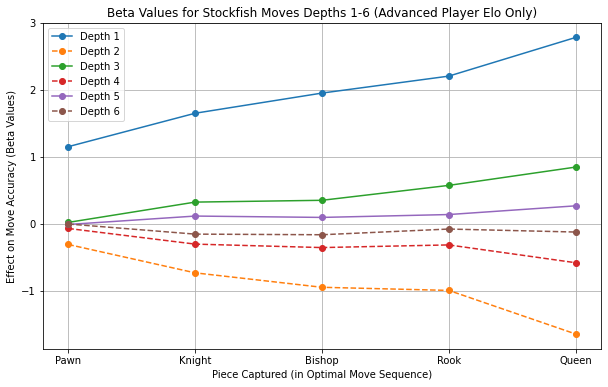

In [31]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_advanced[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_advanced[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Advanced Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

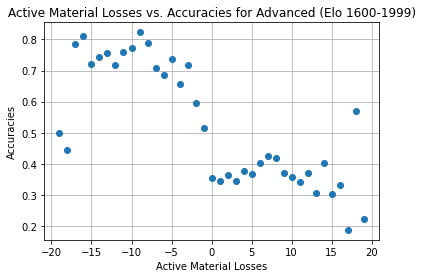

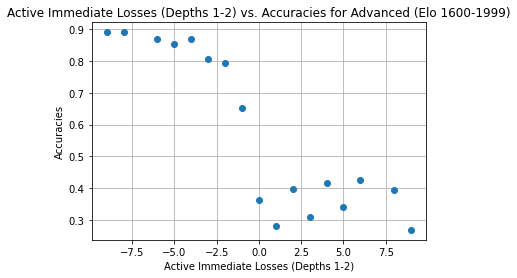

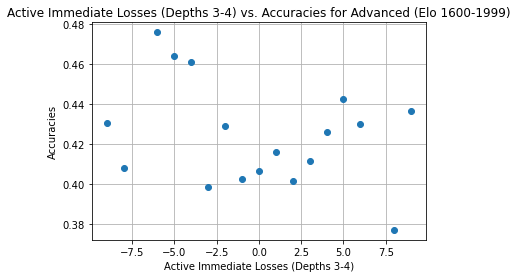

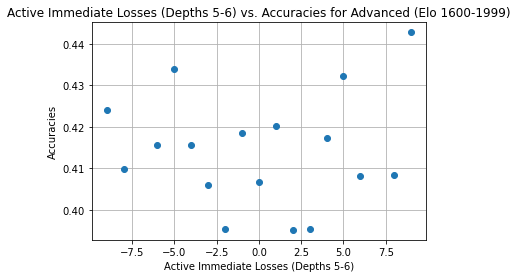

In [7]:
active_material_losses_advanced, accuracies_advanced, curr_co_losses_advanced, p_val_losses_advanced = active_material_loss(combined_delta_materials_advanced, combined_move_matches_advanced)
plt.plot(active_material_losses_advanced, accuracies_advanced, marker='o', linestyle='')
# print(active_material_losses_advanced)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()


active_immediate_losses_advanced, accuracies_ail_advanced, curr_co_ail_advanced, p_val_ail_advanced = active_immediate_loss_1(combined_delta_materials_advanced, combined_move_matches_advanced)
# print(active_immediate_losses_advanced)
plt.plot(active_immediate_losses_advanced, accuracies_ail_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

active_immediate_losses_2_advanced, accuracies_ail_2_advanced, curr_co_ail_2_advanced, p_val_ail_2_advanced = active_immediate_loss_2(combined_delta_materials_advanced, combined_move_matches_advanced)
# print(active_immediate_losses_2_advanced)
plt.plot(active_immediate_losses_2_advanced, accuracies_ail_2_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

active_immediate_losses_3_advanced, accuracies_ail_3_advanced, curr_co_ail_3_advanced, p_val_ail_3_advanced = active_immediate_loss_3(combined_delta_materials_advanced, combined_move_matches_advanced)
# print(active_immediate_losses_3_advanced)
plt.plot(active_immediate_losses_3_advanced, accuracies_ail_3_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

In [32]:
# Master elo range 2000+
# results_folder_only_master_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_master_elo'
results_folder_only_master_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_master_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_master = []
all_move_matches_master = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_master = os.path.join(results_folder_only_master_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_master, 'rb') as f:
        delta_materials_master = np.load(f, allow_pickle=True)
        all_delta_materials_master.append(delta_materials_master)

    move_match_path_master = os.path.join(results_folder_only_master_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_master, 'rb') as f:
        move_matches_master = np.load(f, allow_pickle=True)
        all_move_matches_master.append(move_matches_master)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_master = np.concatenate(all_delta_materials_master)
print(combined_delta_materials_master.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_master = np.concatenate(all_move_matches_master)
print(combined_move_matches_master.shape)
# print(combined_move_matches)

(502337, 36)
(502337,)


In [33]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_master = np.delete(combined_delta_materials_master, [0,6,12,18,24,30], axis=1)

In [35]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_master = combined_move_matches_master.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_master_with_const = sm.add_constant(combined_delta_materials_master)
combined_delta_materials_master_with_const = np.array(combined_delta_materials_master_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_master = sm.Logit(combined_move_matches_master, combined_delta_materials_master_with_const)
logit_result_master = logit_model_master.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_master = logit_result_master.params[1:]  # Exclude the intercept
intercept_master = logit_result_master.params[0]

# Reshape beta_weights for interpretation
beta_weights_master = beta_weights_master.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_master)
print("Intercept:", intercept_master)

Optimization terminated successfully.
         Current function value: 0.649008
         Iterations 6
Beta Weights:
[[ 1.09560914  1.63750423  1.82773201  2.05931024  2.7092837 ]
 [-0.32932017 -0.71218528 -0.92180803 -1.02884609 -1.51626948]
 [ 0.11021578  0.39365209  0.48855356  0.66692002  0.97157066]
 [-0.0657466  -0.29771665 -0.35273199 -0.36848956 -0.67588307]
 [ 0.03527799  0.16721116  0.1931578   0.24471164  0.39089133]
 [ 0.00547314 -0.11635152 -0.11456705 -0.105503   -0.15700529]]
Intercept: -0.45583438939398446


In [36]:
print(logit_result_master.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               502337
Model:                          Logit   Df Residuals:                   502306
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.05593
Time:                        23:13:11   Log-Likelihood:            -3.2602e+05
converged:                       True   LL-Null:                   -3.4534e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4558      0.004   -107.978      0.000      -0.464      -0.448
x1             1.0956      0.010    108.564      0.000       1.076       1.115
x2             1.6375      0.017     96.378      0.0

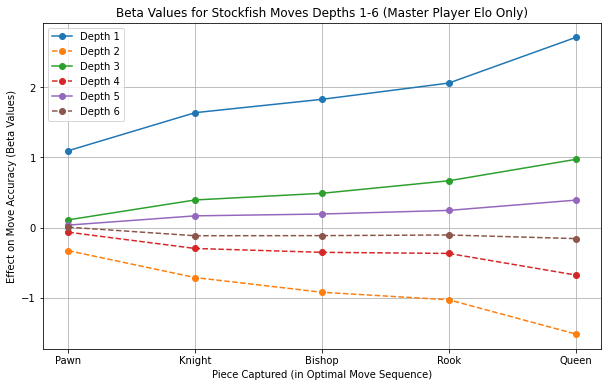

In [37]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_master[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_master[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Master Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
beta_weights_all_elos = combined_array = np.dstack((beta_weights_novice, beta_weights_amateur, beta_weights_advanced, beta_weights_master))
print(beta_weights_all_elos)

[[[ 1.01842323  1.11537466  1.15097811  1.09559051]
  [ 1.56014902  1.68107339  1.64909822  1.63749127]
  [ 1.77411618  1.93040347  1.94967824  1.82765892]
  [ 2.04880434  2.19387079  2.20290099  2.05933934]
  [ 2.28988738  2.66348306  2.77976516  2.70965425]]

 [[-0.22232872 -0.24141731 -0.30807986 -0.32929018]
  [-0.57413279 -0.63760148 -0.73111544 -0.71221453]
  [-0.75533116 -0.84898185 -0.9463735  -0.92163316]
  [-0.59101661 -0.78410225 -0.99318414 -1.02881075]
  [-1.29459069 -1.47542802 -1.64306116 -1.51687617]]

 [[-0.13929854 -0.07518078  0.02129115  0.11011645]
  [ 0.05448843  0.18558033  0.32384622  0.39337829]
  [ 0.10408215  0.20911721  0.3508019   0.48824554]
  [ 0.21329502  0.37443201  0.57292717  0.66673809]
  [ 0.37864918  0.55592562  0.84598424  0.97177406]]

 [[-0.03783445 -0.05782753 -0.06914661 -0.06568477]
  [-0.1206151  -0.20263266 -0.30237265 -0.29744049]
  [-0.21965895 -0.26797819 -0.35391186 -0.35247982]
  [-0.06531629 -0.17491366 -0.31432123 -0.36813595]
  [-0.

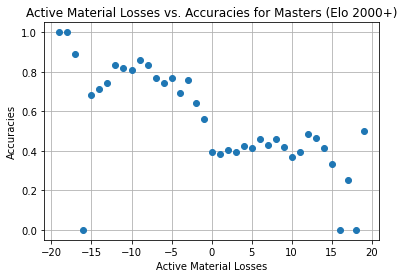

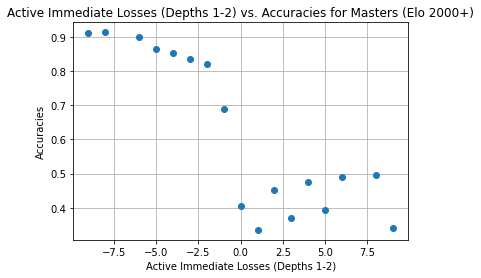

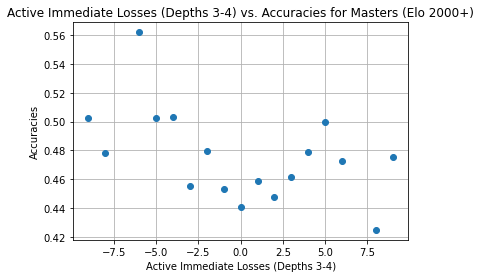

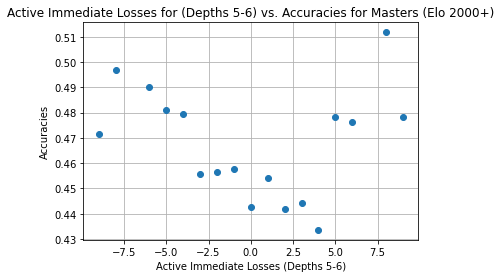

In [9]:
active_material_losses_master, accuracies_master, curr_co_losses_master, p_val_losses_master = active_material_loss(combined_delta_materials_master, combined_move_matches_master)
plt.plot(active_material_losses_master, accuracies_master, marker='o', linestyle='')
# print(active_material_losses_master)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()


active_immediate_losses_master, accuracies_ail_master, curr_co_ail_master, p_val_ail_master = active_immediate_loss_1(combined_delta_materials_master, combined_move_matches_master)
# print(active_immediate_losses_master)
plt.plot(active_immediate_losses_master, accuracies_ail_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

active_immediate_losses_2_master, accuracies_ail_2_master, curr_co_ail_2_master, p_val_ail_2_master = active_immediate_loss_2(combined_delta_materials_master, combined_move_matches_master)
# print(active_immediate_losses_2_master)
plt.plot(active_immediate_losses_2_master, accuracies_ail_2_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

active_immediate_losses_3_master, accuracies_ail_3_master, curr_co_ail_3_master, p_val_ail_3_master = active_immediate_loss_3(combined_delta_materials_master, combined_move_matches_master)
# print(active_immediate_losses_3_master)
plt.plot(active_immediate_losses_3_master, accuracies_ail_3_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses for (Depths 5-6) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

Correlation Coefficient Novice:  -0.8370531844965743
Correlation Coefficient Amateur:  -0.9226794323277925
Correlation Coefficient Advanced:  -0.7827679936746921
Correlation Coefficient Master:  -0.7205964227954325
P Value Novice:  5.8113552392579145e-11
P Value Amateur:  2.594777522888917e-17
P Value Advanced:  3.9158811273219935e-09
P Value Master:  2.3055758775563193e-07


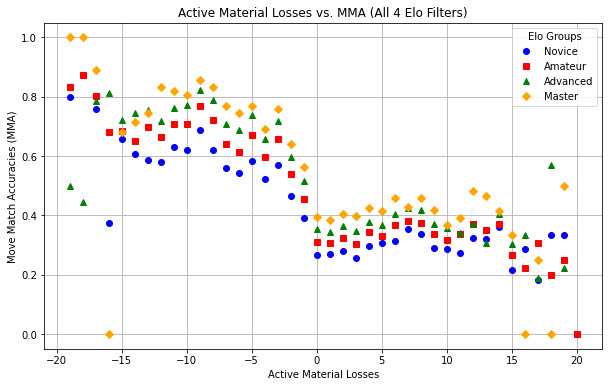

Correlation Coefficient Novice:  -0.8594624163423286
Correlation Coefficient Amateur:  -0.8792753224341923
Correlation Coefficient Advanced:  -0.8781957110985761
Correlation Coefficient Master:  -0.8605527774947002
P Value Novice:  9.831656218195336e-06
P Value Amateur:  3.3396701086161495e-06
P Value Advanced:  3.5586776719242933e-06
P Value Master:  9.304571589990523e-06


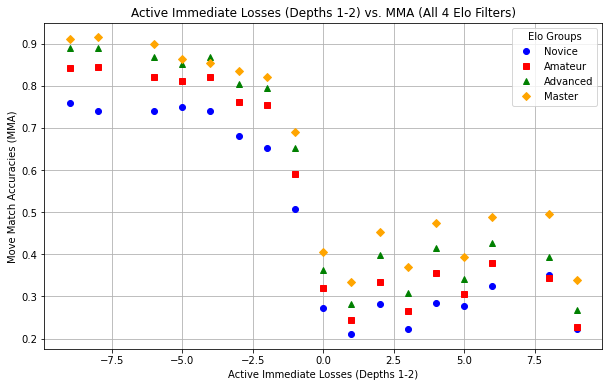

Correlation Coefficient Novice:  0.03388923375034683
Correlation Coefficient Amateur:  -0.05524676172412182
Correlation Coefficient Advanced:  -0.315941946965974
Correlation Coefficient Master:  -0.4885523151884475
P Value Novice:  0.8972611857243393
P Value Amateur:  0.8332013440678956
P Value Advanced:  0.2166865967359839
P Value Master:  0.046602901318909935


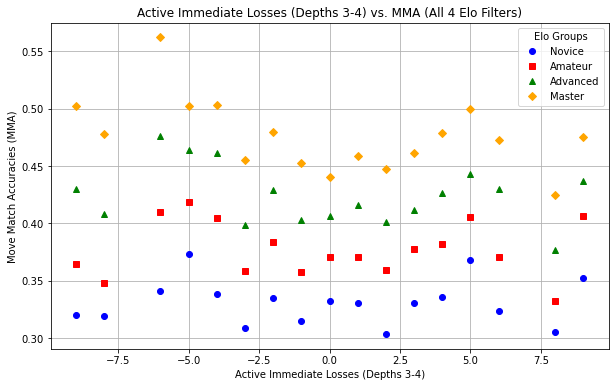

Correlation Coefficient Novice:  0.6415658124336803
Correlation Coefficient Amateur:  0.20884182997570322
Correlation Coefficient Advanced:  0.070071345729073
Correlation Coefficient Master:  -0.08840861704896916
P Value Novice:  0.005502478715634166
P Value Amateur:  0.4211556250105146
P Value Advanced:  0.7892896057903006
P Value Master:  0.7358045391856426


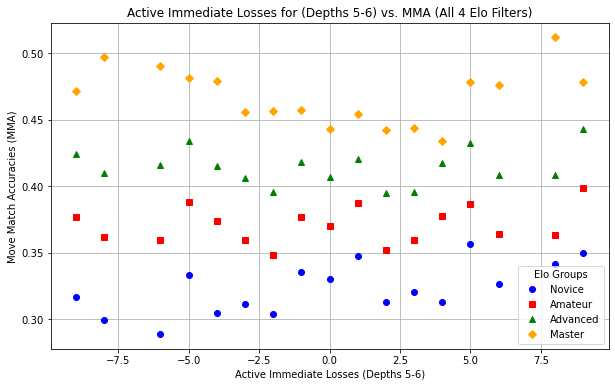

In [12]:
# merged plots across elo groups (4 plots total)
active_material_losses_novice, accuracies_novice, corr_co_losses_novice, p_val_losses_novice = active_material_loss(combined_delta_materials_novice, combined_move_matches_novice)
active_material_losses_amateur, accuracies_amateur, corr_co_losses_amateur, p_val_losses_amateur = active_material_loss(combined_delta_materials_amateur, combined_move_matches_amateur)
active_material_losses_advanced, accuracies_advanced, corr_co_losses_advanced, p_val_losses_advanced = active_material_loss(combined_delta_materials_advanced, combined_move_matches_advanced)
active_material_losses_master, accuracies_master, corr_co_losses_master, p_val_losses_master = active_material_loss(combined_delta_materials_master, combined_move_matches_master)
print("Correlation Coefficient Novice: ", corr_co_losses_novice)
print("Correlation Coefficient Amateur: ", corr_co_losses_amateur)
print("Correlation Coefficient Advanced: ", corr_co_losses_advanced)
print("Correlation Coefficient Master: ", corr_co_losses_master)
print("P Value Novice: ", p_val_losses_novice)
print("P Value Amateur: ", p_val_losses_amateur)
print("P Value Advanced: ", p_val_losses_advanced)
print("P Value Master: ", p_val_losses_master)
plt.figure(figsize=(10, 6))
plt.plot(active_material_losses_novice, accuracies_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_material_losses_amateur, accuracies_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_material_losses_advanced, accuracies_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_material_losses_master, accuracies_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Material Losses')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Material Losses vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()


active_immediate_losses_novice, accuracies_ail_novice, corr_co_ail_novice, p_val_ail_novice = active_immediate_loss_1(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_amateur, accuracies_ail_amateur, corr_co_ail_amateur, p_val_ail_amateur = active_immediate_loss_1(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_advanced, accuracies_ail_advanced, corr_co_ail_advanced, p_val_ail_advanced = active_immediate_loss_1(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_master, accuracies_ail_master, corr_co_ail_master, p_val_ail_master = active_immediate_loss_1(combined_delta_materials_master, combined_move_matches_master)
print("Correlation Coefficient Novice: ", corr_co_ail_novice)
print("Correlation Coefficient Amateur: ", corr_co_ail_amateur)
print("Correlation Coefficient Advanced: ", corr_co_ail_advanced)
print("Correlation Coefficient Master: ", corr_co_ail_master)
print("P Value Novice: ", p_val_ail_novice)
print("P Value Amateur: ", p_val_ail_amateur)
print("P Value Advanced: ", p_val_ail_advanced)
print("P Value Master: ", p_val_ail_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_novice, accuracies_ail_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_amateur, accuracies_ail_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_advanced, accuracies_ail_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_master, accuracies_ail_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 1-2) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()

active_immediate_losses_2_novice, accuracies_ail_2_novice, corr_co_ail_2_novice, p_val_ail_2_novice = active_immediate_loss_2(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_2_amateur, accuracies_ail_2_amateur, corr_co_ail_2_amateur, p_val_ail_2_amateur = active_immediate_loss_2(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_2_advanced, accuracies_ail_2_advanced, corr_co_ail_2_advanced, p_val_ail_2_advanced = active_immediate_loss_2(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_2_master, accuracies_ail_2_master, corr_co_ail_2_master, p_val_ail_2_master = active_immediate_loss_2(combined_delta_materials_master, combined_move_matches_master)
print("Correlation Coefficient Novice: ", corr_co_ail_2_novice)
print("Correlation Coefficient Amateur: ", corr_co_ail_2_amateur)
print("Correlation Coefficient Advanced: ", corr_co_ail_2_advanced)
print("Correlation Coefficient Master: ", corr_co_ail_2_master)
print("P Value Novice: ", p_val_ail_2_novice)
print("P Value Amateur: ", p_val_ail_2_amateur)
print("P Value Advanced: ", p_val_ail_2_advanced)
print("P Value Master: ", p_val_ail_2_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_2_novice, accuracies_ail_2_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_2_amateur, accuracies_ail_2_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_2_advanced, accuracies_ail_2_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_2_master, accuracies_ail_2_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 3-4) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()

active_immediate_losses_3_novice, accuracies_ail_3_novice, corr_co_ail_3_novice, p_val_ail_3_novice = active_immediate_loss_3(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_3_amateur, accuracies_ail_3_amateur, corr_co_ail_3_amateur, p_val_ail_3_amateur = active_immediate_loss_3(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_3_advanced, accuracies_ail_3_advanced, corr_co_ail_3_advanced, p_val_ail_3_advanced = active_immediate_loss_3(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_3_master, accuracies_ail_3_master, corr_co_ail_3_master, p_val_ail_3_master = active_immediate_loss_3(combined_delta_materials_master, combined_move_matches_master)
print("Correlation Coefficient Novice: ", corr_co_ail_3_novice)
print("Correlation Coefficient Amateur: ", corr_co_ail_3_amateur)
print("Correlation Coefficient Advanced: ", corr_co_ail_3_advanced)
print("Correlation Coefficient Master: ", corr_co_ail_3_master)
print("P Value Novice: ", p_val_ail_3_novice)
print("P Value Amateur: ", p_val_ail_3_amateur)
print("P Value Advanced: ", p_val_ail_3_advanced)
print("P Value Master: ", p_val_ail_3_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_3_novice, accuracies_ail_3_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_3_amateur, accuracies_ail_3_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_3_advanced, accuracies_ail_3_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_3_master, accuracies_ail_3_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses for (Depths 5-6) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()